In [1]:
import numpy as np
from scipy.special import hyp1f1
from scipy import integrate
import matplotlib.pyplot as plt
import time as tm
from math import factorial

from __future__ import division

%matplotlib inline

# Defino la funcion de onda radial

In [2]:
def R1F1(n,l,z,r):
    rho = 2 * r * z / n
    rnum = (2 * z / n)**3 * factorial(n + l)
    rden = (factorial(2*l+1))**2 * 2*n * factorial(n-l-1)
    rnorm = np.sqrt(rnum/rden)
    rfunc = (rho)**l * np.exp(-rho/2) * hyp1f1(-n+l+1, 2*l+2, rho)
    R = rnorm * rfunc
    return R

# Defino los vectores para el plot

In [3]:
nlen = 500
rmax = 10.0
rmin = 0.0
r = np.linspace(rmin,rmax,nlen)

# Plot para n = 1, l = 0, Z = 4

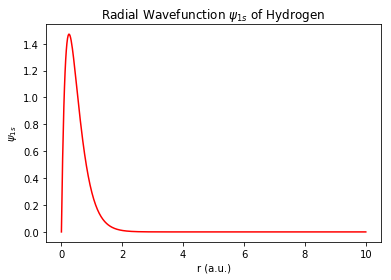

In [4]:
psi_1 = R1F1(1,0,4,r)
plt.plot(r, r*psi_1,'r')
plt.title("Radial Wavefunction $\psi_{1s}$ of Hydrogen")
plt.xlabel("r (a.u.)")
plt.ylabel("$\psi_{1s}$")
plt.show()

# Plot para n = 2, l = 1, Z = 4

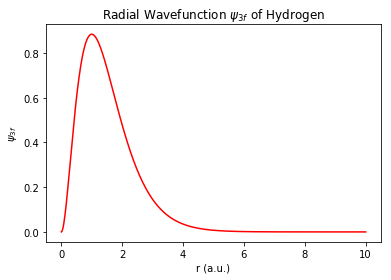

In [5]:
psi_2 = R1F1(2,1,4,r)
plt.plot(r, r*psi_2,'r')
plt.title("Radial Wavefunction $\psi_{3f}$ of Hydrogen")
plt.xlabel("r (a.u.)")
plt.ylabel("$\psi_{3f}$")
plt.show()

# Chequeo ortonormalidad

In [18]:
integrate.quad(lambda r:(r**2*R1F1(2,1,4,r)*R1F1(1,0,4,r)), 0, float('inf'))

(0.48384982573494933, 1.3072126370537772e-08)

- La parte radial no es ortogonal porque estoy en distintos niveles de energia

In [24]:
integrate.quad(lambda r:(r**2*R1F1(2,1,4,r)**2), 0, float('inf'))

(0.9999999999999999, 1.3877796942138986e-08)

In [20]:
integrate.quad(lambda r:(r**2*R1F1(1,0,4,r)**2), 0, float('inf'))

(1.0, 1.2956640677365438e-08)

- Las funciones estan normalizadas

# Calculo valores medios de r^k

In [34]:
rMean_1 = []
rMean_2 = []
exponents_list = [exp for exp in range(-3,4) if exp is not 0]

for i in exponents_list:
    rMean_1.append(integrate.quad(lambda r:(r**(2+i)*R1F1(2,1,4,r)**2), 0, float('inf')))
    rMean_2.append(integrate.quad(lambda r:(r**(2+i)*R1F1(1,0,4,r)**2), 0, float('inf')))

print "Termino 1: (n = 2, l = 1, Z = 4)"
for i,exp in enumerate(exponents_list):
    print "< r^({:d}) > = {:.4f}; error = {:.2e}".format(exp,rMean_1[i][0],rMean_1[i][1])

print "Termino 2: (n = 1, l = 0, Z = 4)"
for i,exp in enumerate(exponents_list):
    print "< r^({:d}) > = {:.4f}; error = {:.2e}".format(exp,rMean_2[i][0],rMean_2[i][1])

Termino 1: (n = 2, l = 1, Z = 4)
< r^(-3) > = 2.6667; error = 2.45e-11
< r^(-2) > = 1.3333; error = 1.26e-09
< r^(-1) > = 1.0000; error = 5.38e-10
< r^(1) > = 1.2500; error = 1.52e-08
< r^(2) > = 1.8750; error = 8.38e-10
< r^(3) > = 3.2812; error = 5.31e-09
Termino 2: (n = 1, l = 0, Z = 4)
< r^(-3) > = 8988.6307; error = 1.60e+03
< r^(-2) > = 32.0000; error = 9.02e-10
< r^(-1) > = 4.0000; error = 1.76e-09
< r^(1) > = 0.3750; error = 8.38e-09
< r^(2) > = 0.1875; error = 3.69e-09
< r^(3) > = 0.1172; error = 8.27e-10


- Se puede ver que para el termino con l = 0, el valor r^-3 explota. Esto es asi porque el l = 0 neutraliza el termino de rho^l ~ r^l de la R_{nl}

# Kato

In [43]:
from scipy.misc import derivative

# Para el termino con l = 0

In [44]:
derivative(lambda r: R1F1(1,0,4,r), 0, dx = 1e-10) / R1F1(1,0,4,0)

-4.000000330961484

# Para el termino con l = 1

In [47]:
print derivative(lambda r: R1F1(2,1,4,r), 0, dx = 1e-10) / R1F1(2,1,4,0)

inf


/home/fakux/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


- La funcion con l = 1 se anula en el origen

# Openheimmer

In [49]:
from scipy.special import sph_harm as Yml

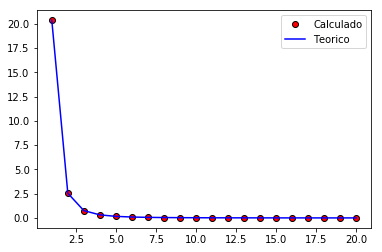

In [54]:
ns = np.arange(1,21)
y = np.zeros(len(ns))
Z = 4

for i,n in enumerate(ns):
    y[i] = np.abs(R1F1(n,0,Z,0)*Yml(0,0,0,0))**2

plt.plot(ns,y,'ro',mec='k',label = 'Calculado')
plt.plot(ns,(Z/ns)**3/np.pi,'b',label = 'Teorico')
plt.legend(loc = 'best')
plt.show()

- Obtuve lo esperado por Openheimmer

# Virial

In [158]:
ur = lambda r: R1F1(1,0,Z,r)*r
d2R = lambda r: -0.5*derivative(ur, r, dx=1e-5, n=2)*ur(r)
Veff = lambda r: -Z/r*ur(r)**2

In [159]:
T = integrate.quad(d2R,0,np.inf)
V = integrate.quad(Veff,0,np.inf)
E_1 = T[0]+V[0]
print "Energia =",T[0]+V[0]
print "<V>/<T> =",V[0]/T[0]

Energia = -7.99999997699
<V>/<T> = -1.99999999425


In [160]:
l = 1
ur = lambda r: R1F1(2,l,Z,r)*r
d2R = lambda r: -0.5*derivative(ur, r, dx=1e-5, n=2)*ur(r)
Veff = lambda r: (-Z/r+l*(l+1)/(2*r**2))*ur(r)**2

In [161]:
T = integrate.quad(d2R,0,np.inf)
V = integrate.quad(Veff,0,np.inf)
E_2 = T[0]+V[0]
print "Energia =",T[0]+V[0]
print "<V>/<T> =",V[0]/T[0]

Energia = -1.99999970963
<V>/<T> = -3.99999825777


# Correcciones de estructura fina